-------------
### ライブラリのインポート

In [1]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# Scikit-learn関連
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.model_selection import train_test_split

# 抽象基底クラス (ABC)
from abc import ABCMeta, abstractmethod

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

plt.style.use("ggplot")

--------
### 実験設定

In [2]:
RANDOM_STATE = 0  # 乱数シード

# パラメータ設定
n = 100000  # データサイズ
p = 20  # 特徴量数
s = 5  # 非ゼロ係数の数
rho = 0.35  # 相関レベル
snr = 1  # 信号対雑音比


-------------------
### 人工データ作成

In [3]:
def simulate_data(n, p, s, rho, snr, seed):
    np.random.seed(seed)

    # 1. β₀の生成
    beta = np.zeros(p)
    beta[:s] = 1

    # 2. 共分散行列Σの生成
    Sigma = np.fromfunction(lambda i, j: rho ** np.abs(i - j), (p, p), dtype=int)

    # 3. Xの生成 (多変量正規分布)
    X = np.random.multivariate_normal(mean=np.zeros(p), cov=Sigma, size=n)

    # 4. 応答変数Yの生成
    signal_variance = beta @ beta  # β₀の分散
    noise_variance = signal_variance / snr  # ノイズ分散 σ²
    noise = np.random.normal(scale=np.sqrt(noise_variance), size=n)  # ノイズ項
    Y = X @ beta + noise

    return X, Y, beta


In [4]:
# シミュレーション実行
X_train, y_train, beta_train = simulate_data(n, p, s, rho, snr, seed=0)
X_test, y_test, beta_test = simulate_data(n, p, s, rho, snr, seed=1)


-------------
### 外れ値を除外しない場合

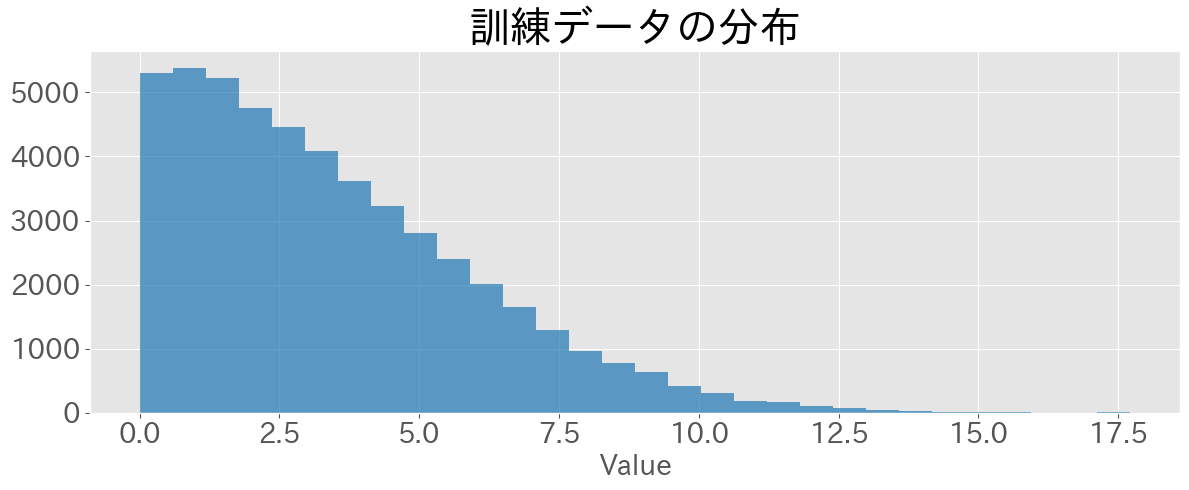

In [5]:
y = y_train

fig, axes = plt.subplots(1, 1, figsize=(12, 5))

# 0以外のデータのヒストグラム
axes.hist(
    y[y > 0],
    bins=30,
    color="#1f77b4",
    alpha=0.7,
)
axes.set_title("訓練データの分布", fontsize=30)
axes.set_xlabel("Value", fontsize=20)
axes.tick_params(axis="both", labelsize=20)

plt.tight_layout()
plt.show()